In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/all data.csv', sep=',')
df

,ID,Abstinence time(days),Body mass index (kg/m²),Age (years),Serum C14:0 (myristic acid),Serum C16:0 (palmitic acid),Serum C16:1 (palmitoleic acid),Serum C18:0 (stearic acid),Serum C18:1 n-9 (oleic acid),Serum total C18:1,...,Sperm C20:1 n-9,Sperm C20:2 n-6,Sperm C22:0,Sperm C20:3 n-6,Sperm C20:4 n-6 and C22:1 n-9 combined,"Sperm C20:5 n-3 (eicosapentaenoic acid, EPA)",Sperm C24:0,Sperm C24:1 n-9,"Sperm C22:5 n-3 (docosapentaenoic acid, DPA)","Sperm C22:6,n3 (docosahexaenoic acid, DHA)"
0,1,"4,0","32,5",36,"0,36","29,72","0,64","13,67","9,00","10,90",...,"0,4","0,5","0,1","4,2","2,5","0,06","1,0","1,2","1,3","25,3"
1,2,"4,0","33,7",61,"0,28","31,22","0,47","11,84","9,02","11,29",...,"0,3","0,9","2,1","2,6","2,6","0,14","1,4","1,6","1,6","17,3"
2,3,"2,0","62,7",51,"0,36","27,95","0,47","16,57","8,65","10,36",...,"0,4","0,4","1,9","2,2","3,2","0,17","1,7","2,0","1,1","21,5"
3,4,"2,5","45,5",38,"0,32","28,10","0,64","16,09","8,56","10,13",...,"0,5","0,5","2,1","2,4","2,9","0,09","1,8","2,2","2,0","14,8"
4,5,"3,0","51,0",33,"0,40","29,94","0,80","14,17","9,47","11,02",...,"0,4","0,7","0,6","4,9","3,0","0,05","1,0","1,5","1,0","26,6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,81,"4,5","24,5",34,"0,26","29,96","0,40","12,38","10,03","11,81",...,"0,3","0,5","2,7","2,7","2,6","0,07","0,6","1,1","0,7","27,8"
81,82,"0,5","22,1",25,"0,24","26,62","0,26","15,03","8,24","10,62",...,"0,5","1,3","3,0","2,1","1,9","0,04","0,7","1,1","1,3","23,6"
82,83,"2,0","24,9",28,"0,39","29,48","0,68","12,12","12,97","15,13",...,"0,3","1,1","1,7","1,6","3,0","0,06","0,7","1,8","1,4","25,5"
83,84,"3,0","25,7",28,"0,22","26,68","0,30","14,74","7,57","9,82",...,"0,2","0,6","0,8","2,0","2,6","0,09","0,8","1,2","1,8","27,6"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   ID                                                    85 non-null     int64 
 1   Abstinence time(days)                                 85 non-null     object
 2   Body mass index (kg/m²)                               85 non-null     object
 3   Age (years)                                           85 non-null     int64 
 4   Serum C14:0 (myristic acid)                           85 non-null     object
 5   Serum C16:0 (palmitic acid)                           85 non-null     object
 6   Serum C16:1 (palmitoleic acid)                        85 non-null     object
 7   Serum C18:0 (stearic acid)                            85 non-null     object
 8   Serum C18:1 n-9 (oleic acid)                          85 non-null     ob

In [4]:
df['Abstinence time(days)'] = df['Abstinence time(days)'].replace('Not reported', np.nan)
#df['Abstinence time(days)'] = pd.to_numeric(df['Abstinence time(days)'], errors='coerce')

In [5]:
df['Abstinence time(days)'].isna().sum()

1

In [6]:
# Step 1: Select object columns
object_cols = df.select_dtypes(include='object').columns

# Step 2: Try to convert each one
for col in object_cols:
    try:
        df[col] = df[col].str.replace(',', '.').astype(float)
    except:
        pass  # Skip if conversion fails (e.g., non-numeric text)


In [7]:
df.dtypes

ID                                                int64
Abstinence time(days)                           float64
Body mass index (kg/m²)                         float64
Age (years)                                       int64
Serum C14:0 (myristic acid)                     float64
                                                 ...   
Sperm C20:5 n-3 (eicosapentaenoic acid, EPA)    float64
Sperm C24:0                                     float64
Sperm C24:1 n-9                                 float64
Sperm C22:5 n-3 (docosapentaenoic acid, DPA)    float64
Sperm C22:6,n3 (docosahexaenoic acid, DHA)      float64
Length: 65, dtype: object

In [8]:
df.isna().sum()

ID                                              0
Abstinence time(days)                           1
Body mass index (kg/m²)                         0
Age (years)                                     0
Serum C14:0 (myristic acid)                     0
                                               ..
Sperm C20:5 n-3 (eicosapentaenoic acid, EPA)    0
Sperm C24:0                                     0
Sperm C24:1 n-9                                 0
Sperm C22:5 n-3 (docosapentaenoic acid, DPA)    0
Sperm C22:6,n3 (docosahexaenoic acid, DHA)      0
Length: 65, dtype: int64

In [9]:
df['Abstinence time(days)'] = df['Abstinence time(days)'].fillna(df['Abstinence time(days)'].mode()[0])
df.head(26)

,ID,Abstinence time(days),Body mass index (kg/m²),Age (years),Serum C14:0 (myristic acid),Serum C16:0 (palmitic acid),Serum C16:1 (palmitoleic acid),Serum C18:0 (stearic acid),Serum C18:1 n-9 (oleic acid),Serum total C18:1,...,Sperm C20:1 n-9,Sperm C20:2 n-6,Sperm C22:0,Sperm C20:3 n-6,Sperm C20:4 n-6 and C22:1 n-9 combined,"Sperm C20:5 n-3 (eicosapentaenoic acid, EPA)",Sperm C24:0,Sperm C24:1 n-9,"Sperm C22:5 n-3 (docosapentaenoic acid, DPA)","Sperm C22:6,n3 (docosahexaenoic acid, DHA)"
0,1,4.0,32.5,36,0.36,29.72,0.64,13.67,9.00,10.90,...,0.4,0.5,0.1,4.2,2.5,0.06,1.0,1.2,1.3,25.3
1,2,4.0,33.7,61,0.28,31.22,0.47,11.84,9.02,11.29,...,0.3,0.9,2.1,2.6,2.6,0.14,1.4,1.6,1.6,17.3
2,3,2.0,62.7,51,0.36,27.95,0.47,16.57,8.65,10.36,...,0.4,0.4,1.9,2.2,3.2,0.17,1.7,2.0,1.1,21.5
3,4,2.5,45.5,38,0.32,28.10,0.64,16.09,8.56,10.13,...,0.5,0.5,2.1,2.4,2.9,0.09,1.8,2.2,2.0,14.8
4,5,3.0,51.0,33,0.40,29.94,0.80,14.17,9.47,11.02,...,0.4,0.7,0.6,4.9,3.0,0.05,1.0,1.5,1.0,26.6
5,6,20.0,47.9,50,0.44,30.71,0.76,13.38,10.11,12.18,...,0.4,0.5,1.1,2.3,2.0,0.05,0.9,1.7,1.1,24.9
6,7,5.0,41.4,45,0.17,27.33,0.81,15.48,7.31,9.39,...,0.5,0.5,2.1,2.8,2.2,0.07,2.4,2.0,1.0,10.8
7,8,3.0,40.8,28,0.15,28.89,0.61,15.52,8.50,10.42,...,0.4,0.5,1.3,2.8,2.7,0.07,2.1,1.7,0.8,21.0
8,9,7.0,41.8,59,0.28,28.03,0.69,16.16,9.42,11.25,...,0.3,0.5,1.9,1.6,2.8,0.14,1.6,2.2,1.6,23.2
9,10,2.5,54.2,47,0.33,27.80,0.76,17.07,8.79,10.44,...,0.3,0.4,0.9,3.2,3.0,0.07,1.4,2.1,0.9,18.6


In [10]:
df.isna().sum()

ID                                              0
Abstinence time(days)                           0
Body mass index (kg/m²)                         0
Age (years)                                     0
Serum C14:0 (myristic acid)                     0
                                               ..
Sperm C20:5 n-3 (eicosapentaenoic acid, EPA)    0
Sperm C24:0                                     0
Sperm C24:1 n-9                                 0
Sperm C22:5 n-3 (docosapentaenoic acid, DPA)    0
Sperm C22:6,n3 (docosahexaenoic acid, DHA)      0
Length: 65, dtype: int64

In [11]:
"""def check_duplicates(df):
    has_dup = df.duplicated()
    true_dup = np.where(has_dup == True)
    if len(true_dup[0]) > 0:
        print("Data has", len(true_dup[0]), "duplicates")
    else:
        print("No duplicates found !!!")

check_duplicates(df)"""

'def check_duplicates(df):\n    has_dup = df.duplicated()\n    true_dup = np.where(has_dup == True)\n    if len(true_dup[0]) > 0:\n        print("Data has", len(true_dup[0]), "duplicates")\n    else:\n        print("No duplicates found !!!")\n\ncheck_duplicates(df)'

In [12]:
desc = df.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
ID,85.0,43.000000,24.681302,1.00,22.00,43.00,64.00,85.00
Abstinence time(days),85.0,3.847059,2.360417,0.50,3.00,3.00,4.00,20.00
Body mass index (kg/m²),85.0,30.230588,7.801633,18.80,24.90,29.20,33.70,62.70
Age (years),85.0,36.447059,10.006552,22.00,29.00,34.00,43.00,61.00
Serum C14:0 (myristic acid),85.0,0.296588,0.086321,0.11,0.24,0.29,0.35,0.52
...,...,...,...,...,...,...,...,...
"Sperm C20:5 n-3 (eicosapentaenoic acid, EPA)",85.0,0.102588,0.092905,0.02,0.06,0.08,0.12,0.66
Sperm C24:0,85.0,1.391765,0.998953,0.10,0.90,1.20,1.60,8.50
Sperm C24:1 n-9,85.0,1.777647,0.666615,0.90,1.40,1.70,2.00,5.10
"Sperm C22:5 n-3 (docosapentaenoic acid, DPA)",85.0,1.265882,0.430822,0.40,1.00,1.20,1.60,2.70


In [13]:
desc['range'] = desc['max'] - desc['min']
desc['zscore_min'] = (desc['mean']-desc['min']) / desc['std']
desc['zscore_max'] = (desc['max']-desc['mean']) / desc['std']
desc

,count,mean,std,min,25%,50%,75%,max,range,zscore_min,zscore_max
ID,85.0,43.000000,24.681302,1.00,22.00,43.00,64.00,85.00,84.00,1.701693,1.701693
Abstinence time(days),85.0,3.847059,2.360417,0.50,3.00,3.00,4.00,20.00,19.50,1.417995,6.843257
Body mass index (kg/m²),85.0,30.230588,7.801633,18.80,24.90,29.20,33.70,62.70,43.90,1.465153,4.161874
Age (years),85.0,36.447059,10.006552,22.00,29.00,34.00,43.00,61.00,39.00,1.443760,2.453686
Serum C14:0 (myristic acid),85.0,0.296588,0.086321,0.11,0.24,0.29,0.35,0.52,0.41,2.161562,2.588151
...,...,...,...,...,...,...,...,...,...,...,...
"Sperm C20:5 n-3 (eicosapentaenoic acid, EPA)",85.0,0.102588,0.092905,0.02,0.06,0.08,0.12,0.66,0.64,0.888955,5.999812
Sperm C24:0,85.0,1.391765,0.998953,0.10,0.90,1.20,1.60,8.50,8.40,1.293118,7.115684
Sperm C24:1 n-9,85.0,1.777647,0.666615,0.90,1.40,1.70,2.00,5.10,4.20,1.316573,4.983917
"Sperm C22:5 n-3 (docosapentaenoic acid, DPA)",85.0,1.265882,0.430822,0.40,1.00,1.20,1.60,2.70,2.30,2.009836,3.328792


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = df.drop('ID', axis=1)

In [16]:
#sns.pairplot(df.drop('ID', axis=1), corner=True, kind = 'reg')
#plt.show()

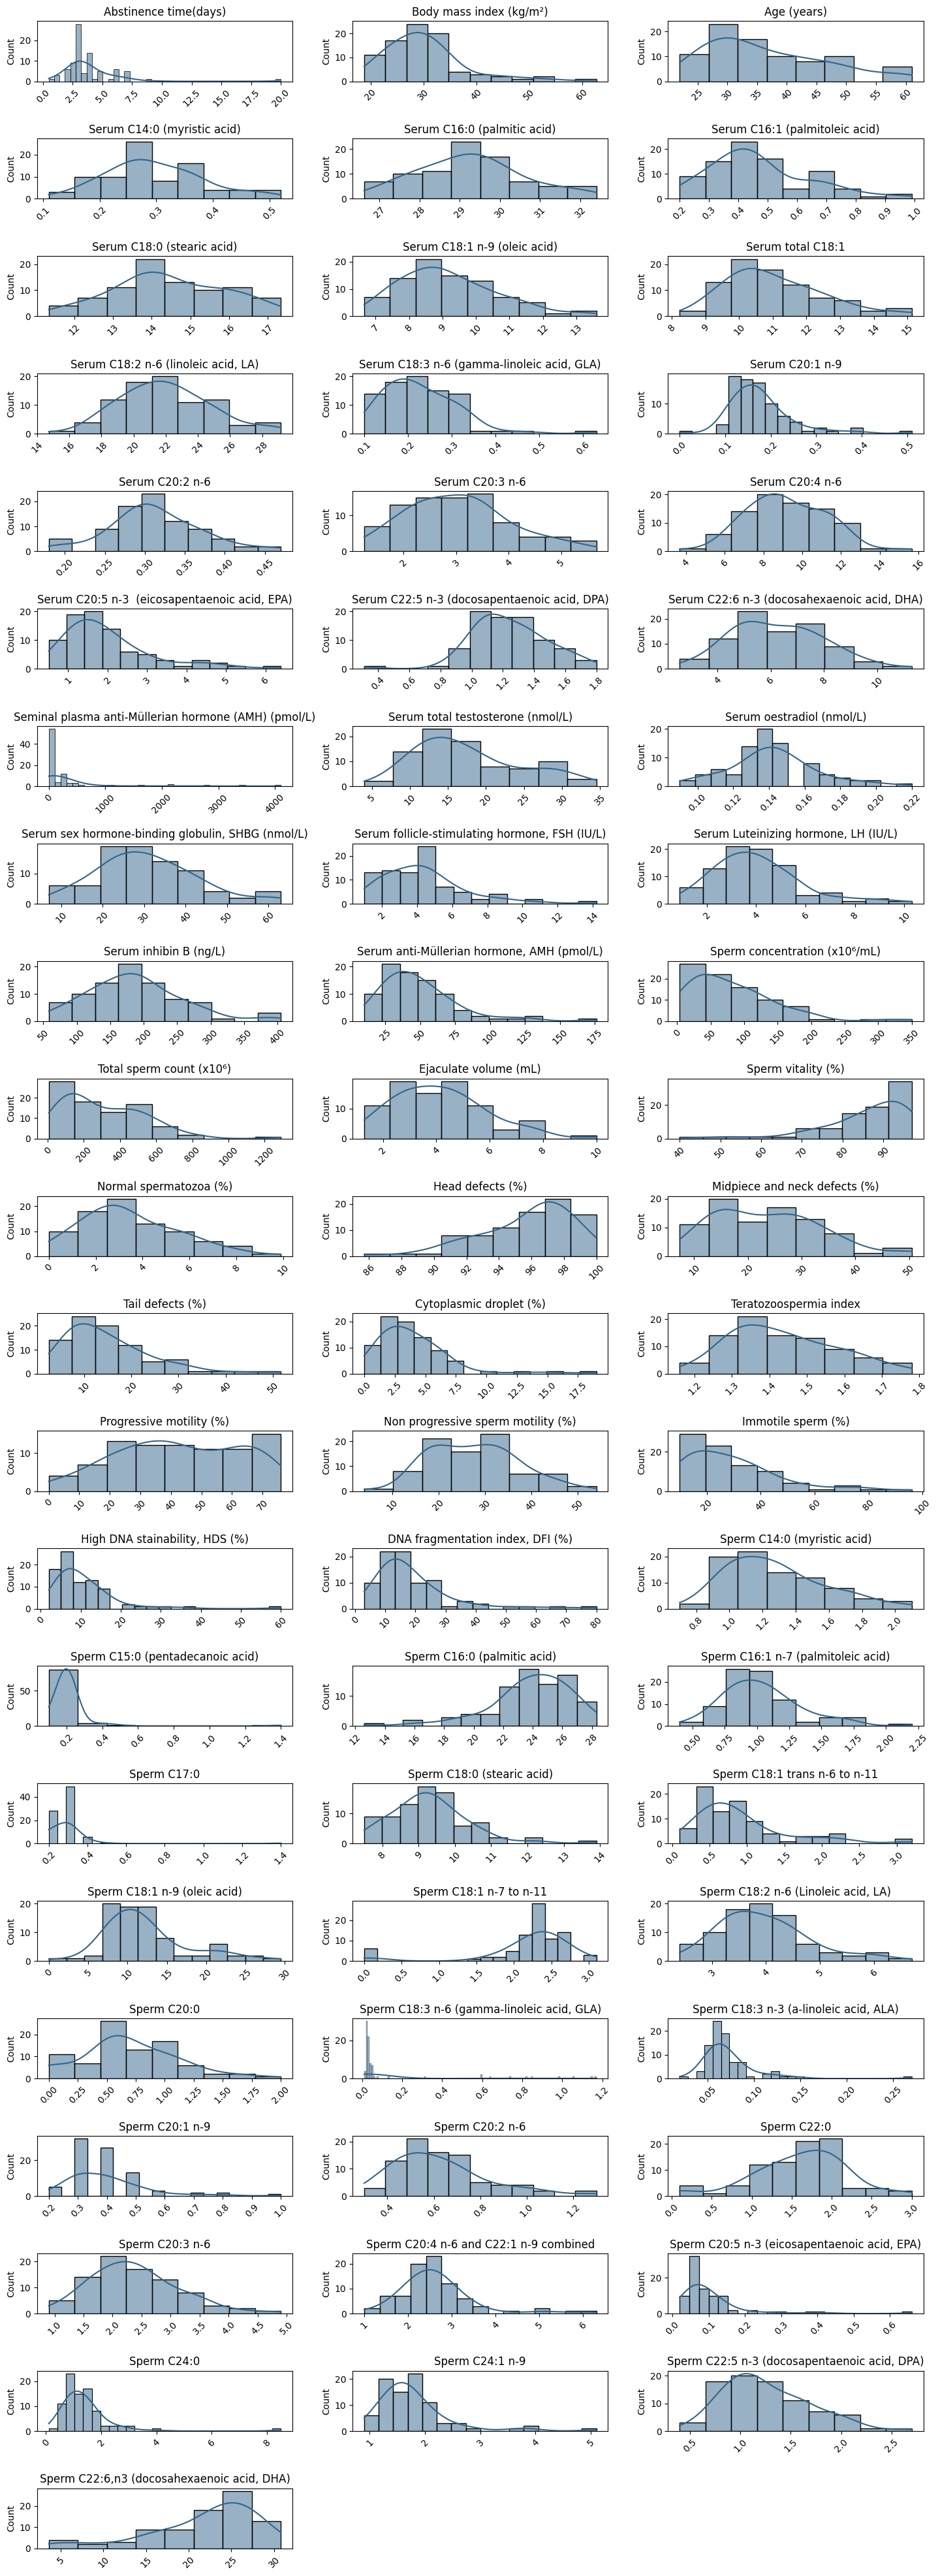

In [17]:
fig, ax = plt.subplots(22, 3, figsize=(15, 40))  # make figure taller and wider
count = 0
for item in df:
    sns.histplot(df[item], kde=True, ax=ax[int(count/3)][count%3], color='#33658A').set(title=item, xlabel='')
    count += 1

# Hide unused subplots
for ax_ in ax.flat[count:]:
    ax_.set_visible(False)

# Improve layout
fig.tight_layout(pad=3)

# Optional: rotate x-tick labels
for ax_ in ax.flat[:count]:
    for label in ax_.get_xticklabels():
        label.set_rotation(45)

In [18]:
df.columns

Index(['Abstinence time(days)', 'Body mass index (kg/m²)', 'Age (years)',
       'Serum C14:0 (myristic acid)', 'Serum C16:0 (palmitic acid)',
       'Serum C16:1 (palmitoleic acid)', 'Serum C18:0 (stearic acid)',
       'Serum C18:1 n-9 (oleic acid)', 'Serum total C18:1',
       'Serum C18:2 n-6 (linoleic acid, LA)',
       'Serum C18:3 n-6 (gamma-linoleic acid, GLA)', 'Serum C20:1 n-9',
       'Serum C20:2 n-6', 'Serum C20:3 n-6', 'Serum C20:4 n-6',
       'Serum C20:5 n-3  (eicosapentaenoic acid, EPA)',
       'Serum C22:5 n-3 (docosapentaenoic acid, DPA)',
       'Serum C22:6 n-3 (docosahexaenoic acid, DHA)',
       'Seminal plasma anti-Müllerian hormone (AMH) (pmol/L)',
       'Serum total testosterone (nmol/L)', 'Serum oestradiol (nmol/L)',
       'Serum sex hormone-binding globulin, SHBG (nmol/L)',
       'Serum follicle-stimulating hormone, FSH (IU/L)',
       'Serum Luteinizing hormone, LH (IU/L)', 'Serum inhibin B (ng/L)',
       'Serum anti-Müllerian hormone, AMH (pmol/L)',


In [32]:
df.columns

Index(['Abstinence time(days)', 'Body mass index (kg/m²)', 'Age (years)',
       'Serum C14:0 (myristic acid)', 'Serum C16:0 (palmitic acid)',
       'Serum C16:1 (palmitoleic acid)', 'Serum C18:0 (stearic acid)',
       'Serum C18:1 n-9 (oleic acid)', 'Serum total C18:1',
       'Serum C18:2 n-6 (linoleic acid, LA)',
       'Serum C18:3 n-6 (gamma-linoleic acid, GLA)', 'Serum C20:1 n-9',
       'Serum C20:2 n-6', 'Serum C20:3 n-6', 'Serum C20:4 n-6',
       'Serum C20:5 n-3  (eicosapentaenoic acid, EPA)',
       'Serum C22:5 n-3 (docosapentaenoic acid, DPA)',
       'Serum C22:6 n-3 (docosahexaenoic acid, DHA)',
       'Seminal plasma anti-Müllerian hormone (AMH) (pmol/L)',
       'Serum total testosterone (nmol/L)', 'Serum oestradiol (nmol/L)',
       'Serum sex hormone-binding globulin, SHBG (nmol/L)',
       'Serum follicle-stimulating hormone, FSH (IU/L)',
       'Serum Luteinizing hormone, LH (IU/L)', 'Serum inhibin B (ng/L)',
       'Serum anti-Müllerian hormone, AMH (pmol/L)',


In [33]:
serum_features = df[['Serum C14:0 (myristic acid)', 'Serum C16:0 (palmitic acid)',
       'Serum C16:1 (palmitoleic acid)', 'Serum C18:0 (stearic acid)',
       'Serum C18:1 n-9 (oleic acid)', 'Serum total C18:1',
       'Serum C18:2 n-6 (linoleic acid, LA)',
       'Serum C18:3 n-6 (gamma-linoleic acid, GLA)', 'Serum C20:1 n-9',
       'Serum C20:2 n-6', 'Serum C20:3 n-6', 'Serum C20:4 n-6',
       'Serum C20:5 n-3  (eicosapentaenoic acid, EPA)',
       'Serum C22:5 n-3 (docosapentaenoic acid, DPA)',
       'Serum C22:6 n-3 (docosahexaenoic acid, DHA)']]

In [34]:
sperm_features = df[['Sperm C14:0 (myristic acid)',
       'Sperm C15:0 (pentadecanoic acid)', 'Sperm C16:0 (palmitic acid)',
       'Sperm C16:1 n-7 (palmitoleic acid)', 'Sperm C17:0',
       'Sperm C18:0 (stearic acid)', 'Sperm C18:1 trans n-6 to n-11',
       'Sperm C18:1 n-9 (oleic acid)', 'Sperm C18:1 n-7 to n-11',
       'Sperm C18:2 n-6 (Linoleic acid, LA)', 'Sperm C20:0',
       'Sperm C18:3 n-6 (gamma-linoleic acid, GLA)',
       'Sperm C18:3 n-3 (a-linoleic acid, ALA)', 'Sperm C20:1 n-9',
       'Sperm C20:2 n-6', 'Sperm C22:0', 'Sperm C20:3 n-6',
       'Sperm C20:4 n-6 and C22:1 n-9 combined',
       'Sperm C20:5 n-3 (eicosapentaenoic acid, EPA)', 'Sperm C24:0',
       'Sperm C24:1 n-9', 'Sperm C22:5 n-3 (docosapentaenoic acid, DPA)',
       'Sperm C22:6,n3 (docosahexaenoic acid, DHA)']] 

In [35]:
hormone_features = df[['Seminal plasma anti-Müllerian hormone (AMH) (pmol/L)',
       'Serum total testosterone (nmol/L)', 'Serum oestradiol (nmol/L)',
       'Serum sex hormone-binding globulin, SHBG (nmol/L)',
       'Serum follicle-stimulating hormone, FSH (IU/L)',
       'Serum Luteinizing hormone, LH (IU/L)', 'Serum inhibin B (ng/L)',
       'Serum anti-Müllerian hormone, AMH (pmol/L)']]

In [36]:
y = (df['Sperm concentration (x10⁶/mL)'] >= 15) #.astype(int)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# Preprocess
scaler = StandardScaler()
X_serum_scaled = scaler.fit_transform(serum_features)

X_train, X_test, y_train, y_test = train_test_split(X_serum_scaled, y, test_size=0.3, random_state=42)

rf_serum = RandomForestClassifier(random_state=42)
rf_serum.fit(X_train, y_train)
y_pred_serum = rf_serum.predict(X_test)

print("Serum-based model:")
print(classification_report(y_test, y_pred_serum))
print("Serum ROC-AUC:", roc_auc_score(y_test, rf_serum.predict_proba(X_test)[:,1]))

Serum-based model:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         3
        True       0.88      1.00      0.94        23

    accuracy                           0.88        26
   macro avg       0.44      0.50      0.47        26
weighted avg       0.78      0.88      0.83        26

Serum ROC-AUC: 0.6521739130434783


In [38]:
# Preprocess
scaler = StandardScaler()
X_sperm_scaled = scaler.fit_transform(sperm_features)

X_train, X_test, y_train, y_test = train_test_split(X_sperm_scaled, y, test_size=0.3, random_state=42)

rf_sperm = RandomForestClassifier(random_state=42)
rf_sperm.fit(X_train, y_train)
y_pred_sperm = rf_sperm.predict(X_test)

print("Sperm-based model:")
print(classification_report(y_test, y_pred_sperm))
print("Sperm ROC-AUC:", roc_auc_score(y_test, rf_sperm.predict_proba(X_test)[:,1]))

Sperm-based model:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         3
        True       1.00      1.00      1.00        23

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Sperm ROC-AUC: 1.0


In [40]:
# Preprocess
scaler = StandardScaler()
X_hormone_scaled = scaler.fit_transform(hormone_features)

X_train, X_test, y_train, y_test = train_test_split(X_hormone_scaled, y, test_size=0.3, random_state=42)

rf_hormone = RandomForestClassifier(random_state=42)
rf_hormone.fit(X_train, y_train)
y_pred_hormone = rf_hormone.predict(X_test)

print("Hormone-based model:")
print(classification_report(y_test, y_pred_hormone))
print("Hormone ROC-AUC:", roc_auc_score(y_test, rf_hormone.predict_proba(X_test)[:,1]))

Hormone-based model:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         3
        True       0.88      1.00      0.94        23

    accuracy                           0.88        26
   macro avg       0.44      0.50      0.47        26
weighted avg       0.78      0.88      0.83        26

Hormone ROC-AUC: 0.927536231884058


### Baseline model

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Binary fertility label (e.g. sperm conc ≥ 15)
df['Fertility_Label'] = (df['Sperm concentration (x10⁶/mL)'] >= 15).astype(int)

# Features and target
X = df.drop(['Sperm concentration (x10⁶/mL)', 'Fertility_Label'], axis=1)
y = df['Fertility_Label']

# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Trian ROC-AUC:", roc_auc_score(y_train, rf.predict_proba(X_train)[:,1]))
print("Test ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

[[ 3  0]
 [ 0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        23

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Trian ROC-AUC: 1.0
Test ROC-AUC: 1.0


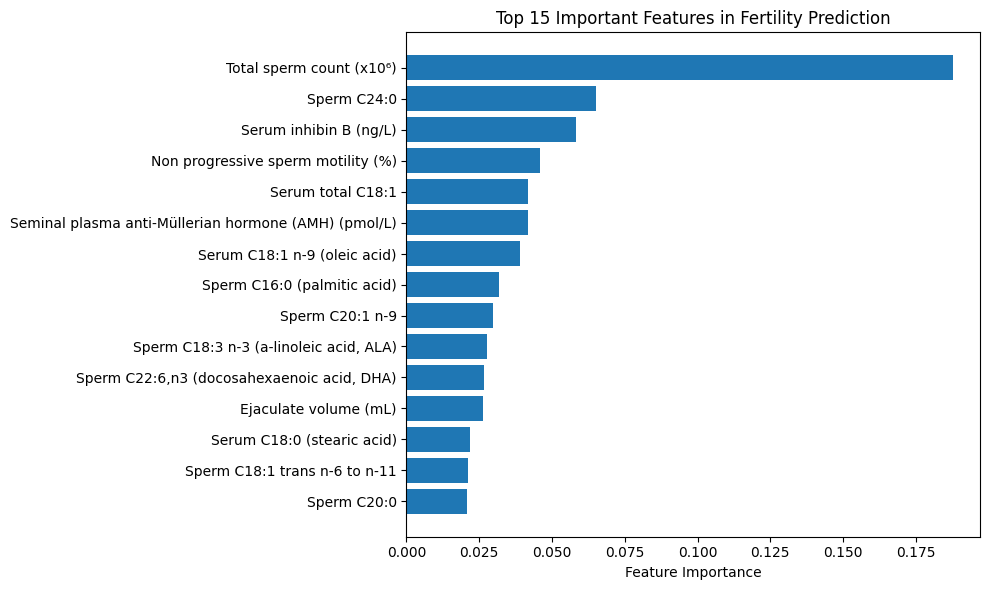

In [42]:
importances = rf.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

# Plot top 15
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(15), importances[sorted_indices[:15]][::-1], align='center')
plt.yticks(range(15), feature_names[sorted_indices[:15]][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features in Fertility Prediction')
plt.tight_layout()
plt.show()

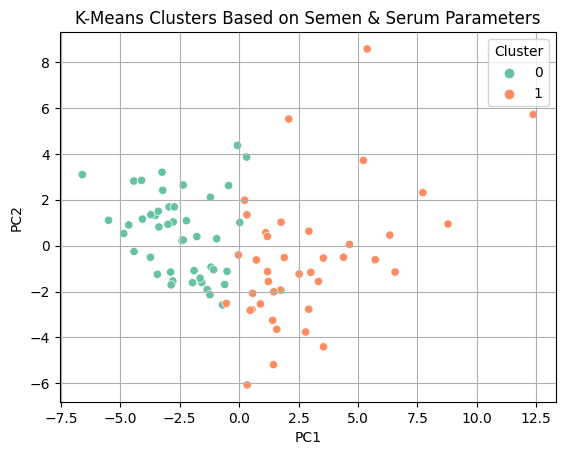

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 2. Optional: Reduce to 2D with PCA for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 4. Visualize
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('K-Means Clusters Based on Semen & Serum Parameters')
plt.grid(True)
plt.show()

In [44]:
df['Cluster'] = clusters
df['Fertility_Label'] = (df['Sperm concentration (x10⁶/mL)'] >= 15)
pd.crosstab(df['Cluster'], df['Fertility_Label'])

Fertility_Label,False,True
Cluster,,
0,1,44
1,10,30
